In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
df=pd.read_csv('/content/Mall_Customers.csv')

In [ ]:
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.shape

(200, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
df.columns=['CustomerID','Gender','Age','Annual_income','Spending_score']

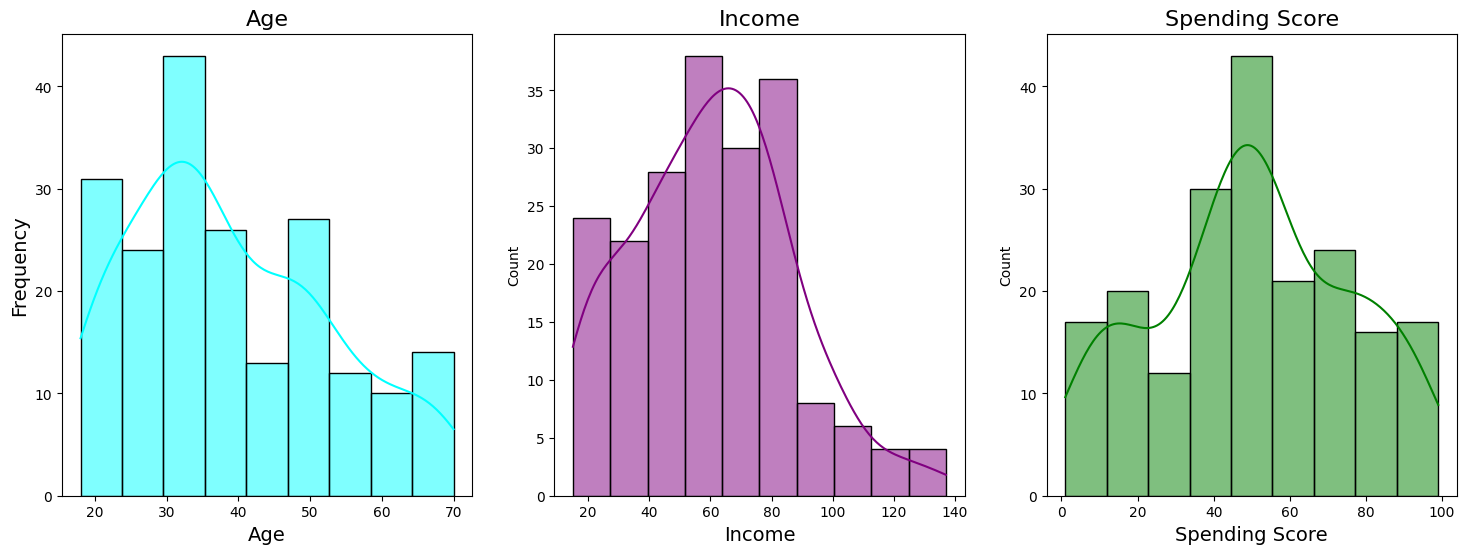

In [ ]:
# Plotting frequency distribution of age, annual income, and spending score
plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
sns.histplot(df['Age'], color='cyan', kde=True)
plt.title('Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.subplot(1,3,2)
sns.histplot(df['Annual_income'], color='purple', kde=True)
plt.title('Income', fontsize=16)
plt.xlabel('Income', fontsize=14)

plt.subplot(1,3,3)
sns.histplot(df['Spending_score'], color='green', kde=True)
plt.title('Spending Score', fontsize=16)
plt.xlabel('Spending Score', fontsize=14)

plt.show()

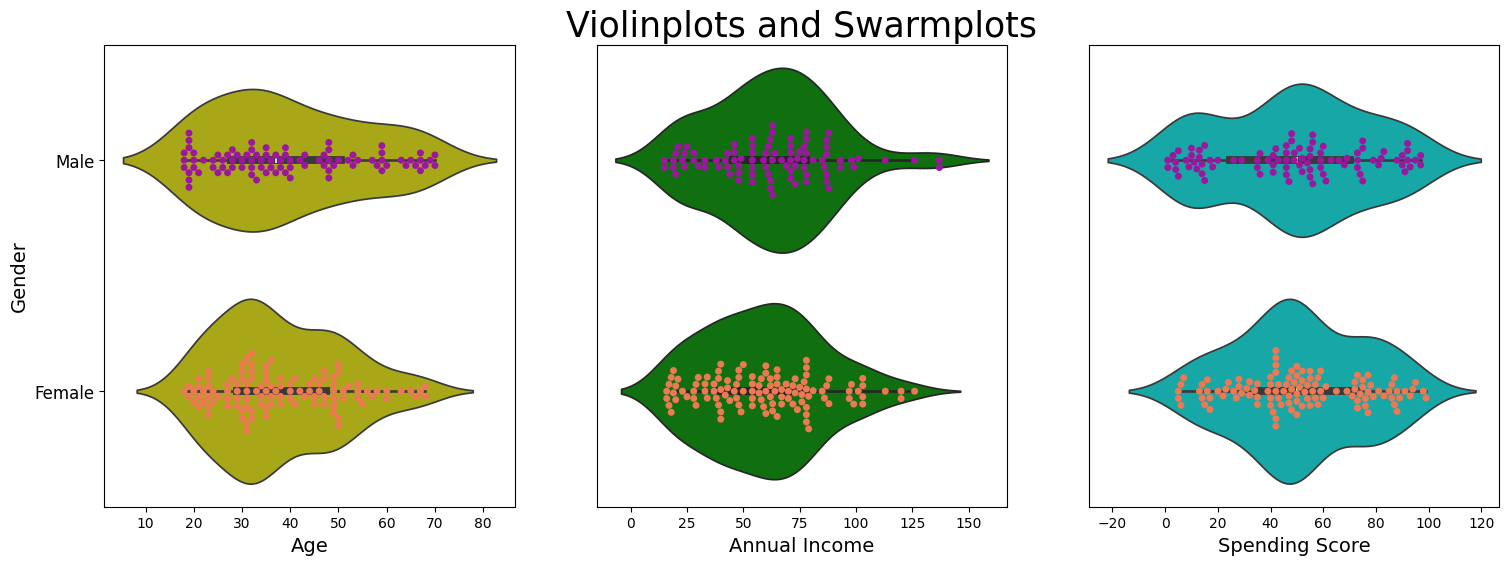

In [ ]:
# Plotting swarm and violin plots for age, annual income, and spending score based on gender
plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
sns.violinplot(x='Age', y='Gender', data=df, color='y')
sns.swarmplot(x='Age', y='Gender', data=df, palette='plasma', hue='Gender', legend=False)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Gender', fontsize=14)
plt.yticks([0,1],['Male','Female'],fontsize=12 )

plt.subplot(1,3,2)
sns.violinplot(x='Annual_income', y='Gender', data=df,color='g')
sns.swarmplot(x='Annual_income', y='Gender', data=df,palette='plasma', hue='Gender', legend=False)
plt.xlabel('Annual Income', fontsize=14)
plt.ylabel(' ')
plt.yticks([])
plt.title('Violinplots and Swarmplots',fontsize=25)

plt.subplot(1,3,3)
sns.violinplot(x='Spending_score', y='Gender', data=df, color='c')
sns.swarmplot(x='Spending_score', y='Gender', data=df,palette='plasma', hue='Gender', legend=False)
plt.xlabel('Spending Score', fontsize=14)
plt.ylabel(' ')
plt.yticks([])

plt.show()

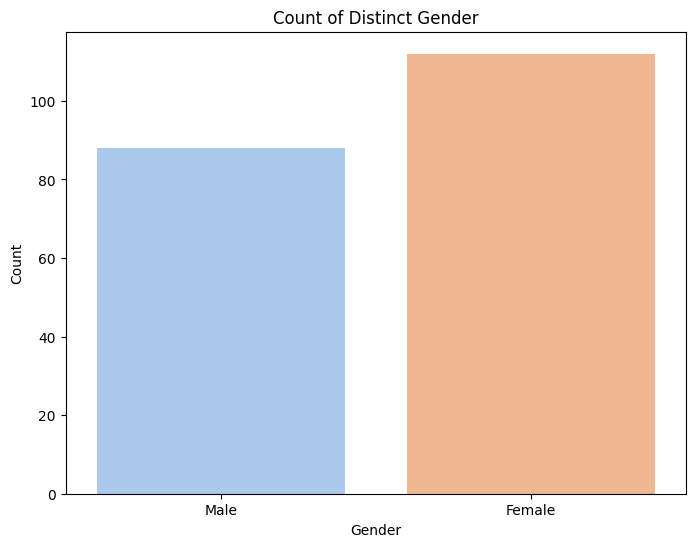

In [ ]:
# Plotting a bar chart for the count of distinct gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df, palette='pastel', hue='Gender', legend=False)
plt.title('Count of Distinct Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

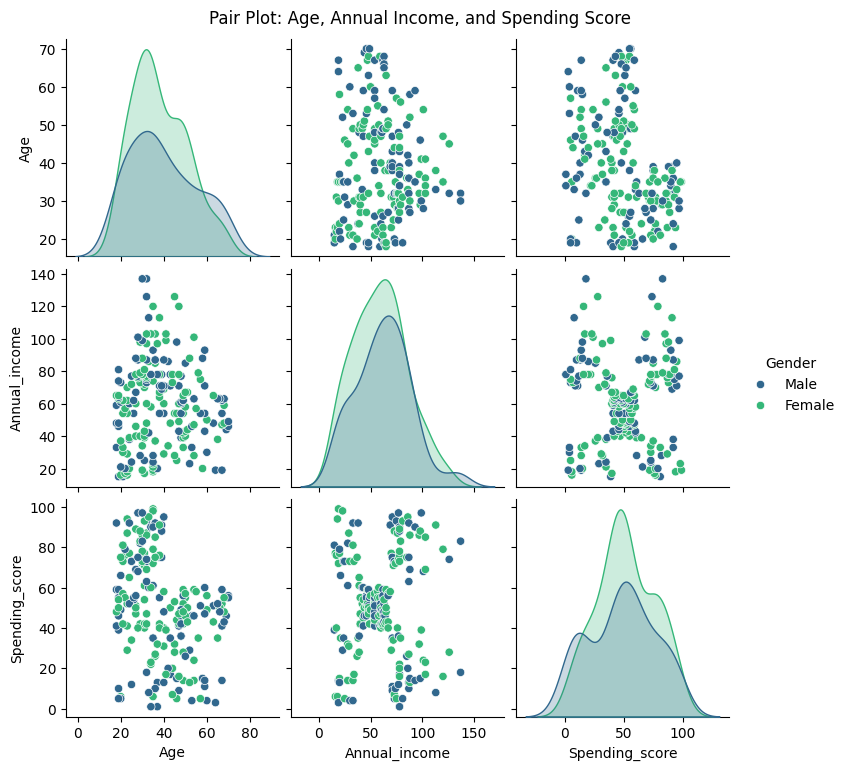

In [ ]:
# Pair Plot for Age, Annual Income, and Spending Score
sns.pairplot(df.drop('CustomerID', axis=1), hue='Gender', palette='viridis')
plt.suptitle('Pair Plot: Age, Annual Income, and Spending Score', y=1.02)
plt.show()

In [70]:
#Segmentation Based on Age and Spending Score
X=df.iloc[:,[2,4]].values

In [71]:
print(X)

[[19 39]
 [21 81]
 [20  6]
 [23 77]
 [31 40]
 [22 76]
 [35  6]
 [23 94]
 [64  3]
 [30 72]
 [67 14]
 [35 99]
 [58 15]
 [24 77]
 [37 13]
 [22 79]
 [35 35]
 [20 66]
 [52 29]
 [35 98]
 [35 35]
 [25 73]
 [46  5]
 [31 73]
 [54 14]
 [29 82]
 [45 32]
 [35 61]
 [40 31]
 [23 87]
 [60  4]
 [21 73]
 [53  4]
 [18 92]
 [49 14]
 [21 81]
 [42 17]
 [30 73]
 [36 26]
 [20 75]
 [65 35]
 [24 92]
 [48 36]
 [31 61]
 [49 28]
 [24 65]
 [50 55]
 [27 47]
 [29 42]
 [31 42]
 [49 52]
 [33 60]
 [31 54]
 [59 60]
 [50 45]
 [47 41]
 [51 50]
 [69 46]
 [27 51]
 [53 46]
 [70 56]
 [19 55]
 [67 52]
 [54 59]
 [63 51]
 [18 59]
 [43 50]
 [68 48]
 [19 59]
 [32 47]
 [70 55]
 [47 42]
 [60 49]
 [60 56]
 [59 47]
 [26 54]
 [45 53]
 [40 48]
 [23 52]
 [49 42]
 [57 51]
 [38 55]
 [67 41]
 [46 44]
 [21 57]
 [48 46]
 [55 58]
 [22 55]
 [34 60]
 [50 46]
 [68 55]
 [18 41]
 [48 49]
 [40 40]
 [32 42]
 [24 52]
 [47 47]
 [27 50]
 [48 42]
 [20 49]
 [23 41]
 [49 48]
 [67 59]
 [26 55]
 [49 56]
 [21 42]
 [66 50]
 [54 46]
 [68 43]
 [66 48]
 [65 52]
 

In [72]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

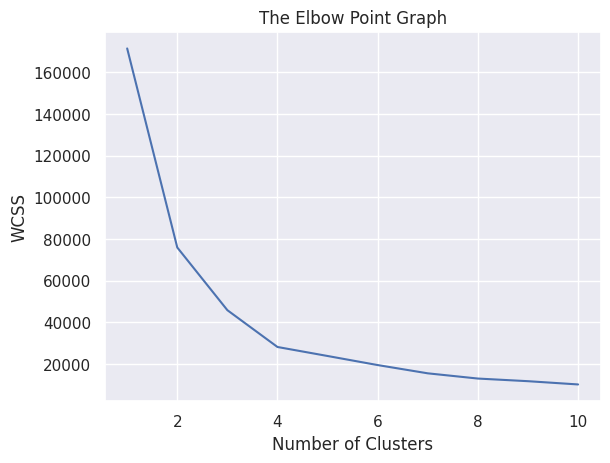

In [73]:
sns.set()
plt.plot(range(1,11),wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [75]:
kmeans=KMeans(n_clusters=4, init='k-means++', random_state=0, n_init=10)
Y=kmeans.fit_predict(X)
print(Y)

[2 1 0 1 2 1 0 1 0 1 0 1 0 1 0 1 2 2 0 1 2 1 0 1 0 1 0 2 0 1 0 1 0 1 0 1 0
 1 0 1 3 1 3 2 0 2 3 2 2 2 3 2 2 3 3 3 3 3 2 3 3 2 3 3 3 2 3 3 2 2 3 3 3 3
 3 2 3 2 2 3 3 2 3 3 2 3 3 2 2 3 3 2 3 2 2 2 3 2 3 2 2 3 3 2 3 2 3 3 3 3 3
 2 2 2 2 2 3 3 3 3 2 2 2 1 2 1 3 1 0 1 0 1 2 1 0 1 0 1 0 1 0 1 2 1 0 1 3 1
 0 1 0 1 0 1 0 1 0 1 0 1 3 1 0 1 0 1 0 1 0 2 0 1 0 1 0 1 0 1 0 1 0 1 0 1 2
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


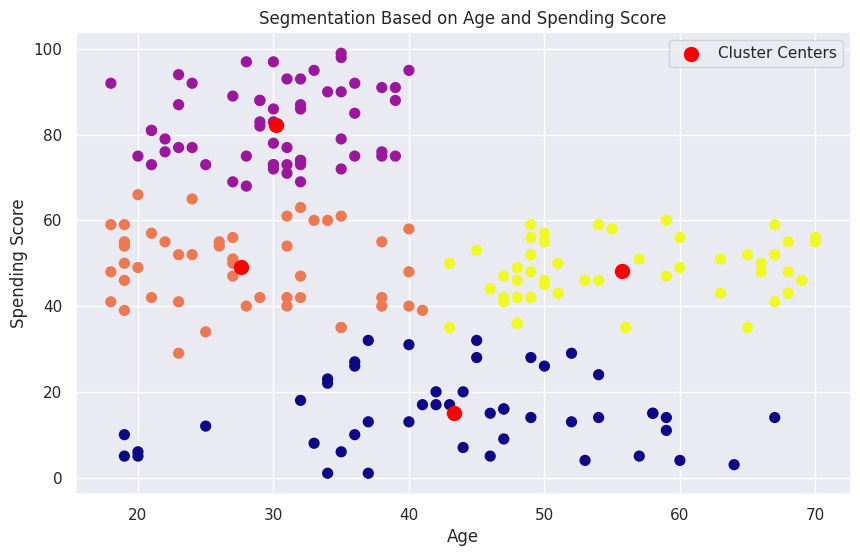

In [80]:
# Visualize the segmentation
plt.figure(figsize=(10, 6))

# Scatter plot for Age and Spending Score with colors based on clusters
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='plasma', s=50)

# Plot cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='o', s=100, label='Cluster Centers')

plt.title('Segmentation Based on Age and Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

In [81]:
#Segmentation Based on Annual Income and Spending Score
X=df.iloc[:,[3,4]].values

In [82]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [83]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

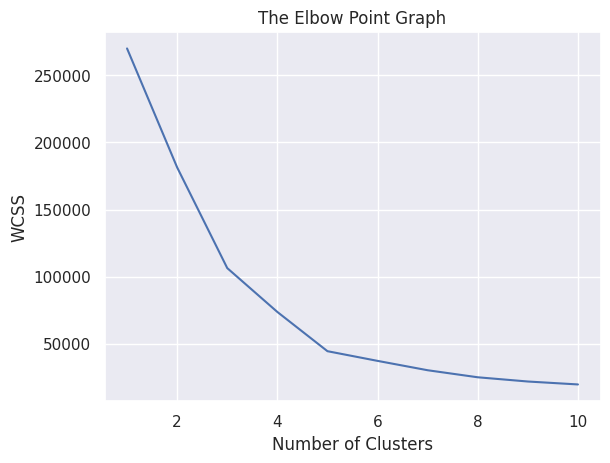

In [84]:
sns.set()
plt.plot(range(1,11),wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [85]:
kmeans=KMeans(n_clusters=5, init='k-means++', random_state=0, n_init=10)
Y=kmeans.fit_predict(X)
print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


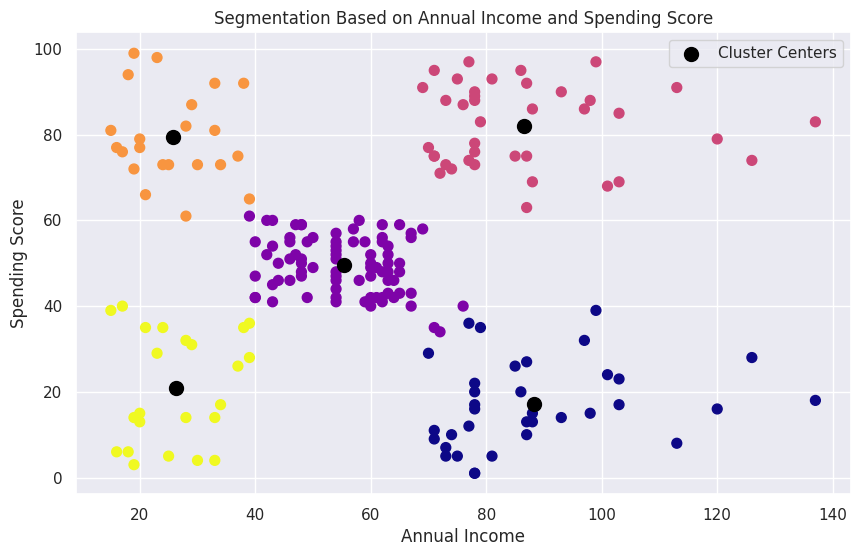

In [86]:
# Visualize the segmentation
plt.figure(figsize=(10, 6))

# Scatter plot for Annual Income and Spending Score with colors based on clusters
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='plasma', s=50)

# Plot cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', marker='o', s=100, label='Cluster Centers')

plt.title('Segmentation Based on Annual Income and Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

In [87]:
#Segmentation Based on Age, Annual Income and Spending Score
X=df.iloc[:,[2,3,4]].values

In [88]:
print(X)

[[ 19  15  39]
 [ 21  15  81]
 [ 20  16   6]
 [ 23  16  77]
 [ 31  17  40]
 [ 22  17  76]
 [ 35  18   6]
 [ 23  18  94]
 [ 64  19   3]
 [ 30  19  72]
 [ 67  19  14]
 [ 35  19  99]
 [ 58  20  15]
 [ 24  20  77]
 [ 37  20  13]
 [ 22  20  79]
 [ 35  21  35]
 [ 20  21  66]
 [ 52  23  29]
 [ 35  23  98]
 [ 35  24  35]
 [ 25  24  73]
 [ 46  25   5]
 [ 31  25  73]
 [ 54  28  14]
 [ 29  28  82]
 [ 45  28  32]
 [ 35  28  61]
 [ 40  29  31]
 [ 23  29  87]
 [ 60  30   4]
 [ 21  30  73]
 [ 53  33   4]
 [ 18  33  92]
 [ 49  33  14]
 [ 21  33  81]
 [ 42  34  17]
 [ 30  34  73]
 [ 36  37  26]
 [ 20  37  75]
 [ 65  38  35]
 [ 24  38  92]
 [ 48  39  36]
 [ 31  39  61]
 [ 49  39  28]
 [ 24  39  65]
 [ 50  40  55]
 [ 27  40  47]
 [ 29  40  42]
 [ 31  40  42]
 [ 49  42  52]
 [ 33  42  60]
 [ 31  43  54]
 [ 59  43  60]
 [ 50  43  45]
 [ 47  43  41]
 [ 51  44  50]
 [ 69  44  46]
 [ 27  46  51]
 [ 53  46  46]
 [ 70  46  56]
 [ 19  46  55]
 [ 67  47  52]
 [ 54  47  59]
 [ 63  48  51]
 [ 18  48  59]
 [ 43  48 

In [89]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

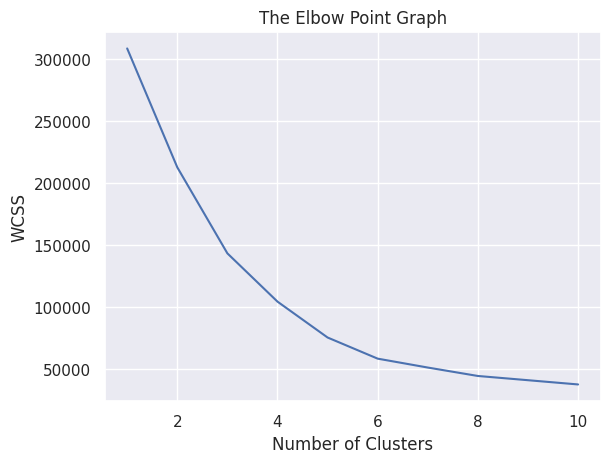

In [90]:
sns.set()
plt.plot(range(1,11),wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [91]:
kmeans=KMeans(n_clusters=6, init='k-means++', random_state=0, n_init=10)
Y=kmeans.fit_predict(X)
print(Y)

[5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5
 4 5 4 1 4 1 0 5 4 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1
 1 0 1 0 0 1 1 0 1 1 0 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 1
 0 0 0 0 0 1 1 1 1 0 0 0 3 0 3 2 3 2 3 2 3 0 3 2 3 2 3 2 3 2 3 0 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3]


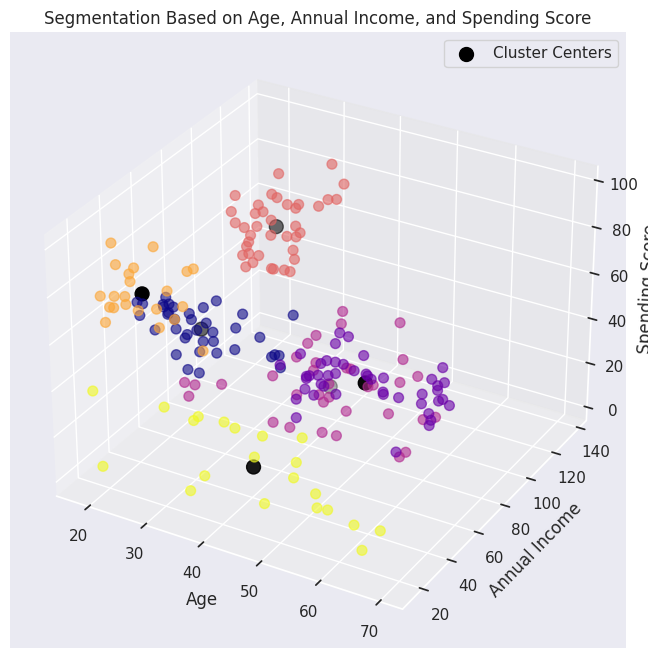

In [93]:
# Visualize the segmentation in 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for 'Age', 'Annual Income', and 'Spending Score' with colors based on clusters
scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=Y, cmap='plasma', s=50, alpha=0.6)

# Plot cluster centers
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], c='black', marker='o', s=100, label='Cluster Centers')

# Set labels
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')

# Set the title
ax.set_title('Segmentation Based on Age, Annual Income, and Spending Score')

# Add legend
ax.legend()

# Show the plot
plt.show()